### 用Popularity做 OLS 模型

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
# 讀取 A1 與 A2 資料
high = pd.read_csv("data/high_popularity_spotify_data.csv")
low = pd.read_csv("data/low_popularity_spotify_data.csv")

    
df = pd.concat([high, low], ignore_index=True)
df.head()

df['playlist_genre'].value_counts()


playlist_genre
electronic    589
pop           515
latin         425
hip-hop       395
ambient       359
rock          345
lofi          299
world         228
arabic        208
brazilian     148
jazz          146
gaming        133
classical     121
blues          88
afrobeats      82
wellness       80
punk           74
turkish        71
folk           68
indian         57
r&b            50
metal          49
soul           44
gospel         39
korean         34
funk           28
cantopop       27
reggae         24
j-pop          23
k-pop          17
indie          17
mandopop       14
soca           14
country        11
disco           9
Name: count, dtype: int64

In [3]:
def backward_selection(data, response, threshold_in=0.05):
    initial_features = []
    remaining_features = list(data.columns)
    remaining_features.remove(response)

    while True:
        changed = False
        worst_pval = 0
        worst_candidate = None

        for candidate in remaining_features:
            formula = "{} ~ {}".format(response, ' + '.join(remaining_features))
            model = smf.ols(formula, data).fit()
            pval = model.pvalues[candidate]
            if pval > threshold_in and pval > worst_pval:
                worst_candidate = candidate
                worst_pval = pval

        if worst_candidate is not None:
            remaining_features.remove(worst_candidate)
            changed = True
            print(f"{worst_candidate} is removed with p-value {worst_pval:.4f}.")
            print()

        if not changed:
            print('No variable is removed. Stop.')
            break

    formula = "{} ~ {}".format(response, ' + '.join(remaining_features))
    model = smf.ols(formula, data).fit()
    return model



In [4]:
import statsmodels.formula.api as smf

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True)

# 建立模型資料集，包含所有欄位（去除目標變數與 genre_dummies 重複欄位）
exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors], genre_dummies], axis=1)

# 自動產生公式
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# 建模
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# 顯示結果
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     45.90
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        01:21:52   Log-Likelihood:                -20398.
No. Observations:                4830   AIC:                         4.089e+04
Df Residuals:                    4783   BIC:                         4.120e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Backward Stepwise Regression
### 應變數為 track_popularity


In [5]:

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True).astype(int)

# 建立模型資料集，包含所有欄位（去除目標變數與 genre_dummies 重複欄位）
exclude_cols = ['playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],
    genre_dummies[[col for col in genre_dummies.columns if col.startswith('genre_')]]
], axis=1)

# print(data.shape)
# display(data['genre_ambient'].value_counts())
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

liveness is removed with p-value 0.9714.

genre_soul is removed with p-value 0.8937.

genre_mandopop is removed with p-value 0.7334.

genre_lofi is removed with p-value 0.7634.

genre_ambient is removed with p-value 0.6624.

duration_ms is removed with p-value 0.6585.

mode is removed with p-value 0.5505.

acousticness is removed with p-value 0.4246.

genre_latin is removed with p-value 0.3427.

genre_reggae is removed with p-value 0.3427.

genre_country is removed with p-value 0.2861.

tempo is removed with p-value 0.2366.

energy is removed with p-value 0.1674.

genre_jazz is removed with p-value 0.1677.

genre_electronic is removed with p-value 0.0753.

genre_indie is removed with p-value 0.0577.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.300
Method:                

### 🔍 殘差圖觀察重點
#### ✅ 水平橘線是殘差平均線（0）
正常情況下，點應大致分布在橘線上下，無明顯形狀。

#### ❌ 圖中問題
漏斗形（右側較窄）：

表示 異質變異（heteroscedasticity），預測值越大時殘差變異越小，這違反了迴歸分析的基本假設（殘差變異應該一致）。

意味著模型對於不同預測值的解釋力不一致，可能在中低預測值時失準。

非隨機分布：

正常的殘差圖應呈現無規律的雲狀分布，但這張圖呈現某種錐形，可能代表模型形式錯誤（例如少了非線性項）。

Text(0, 0.5, 'Standardized Residuals of track popularity')

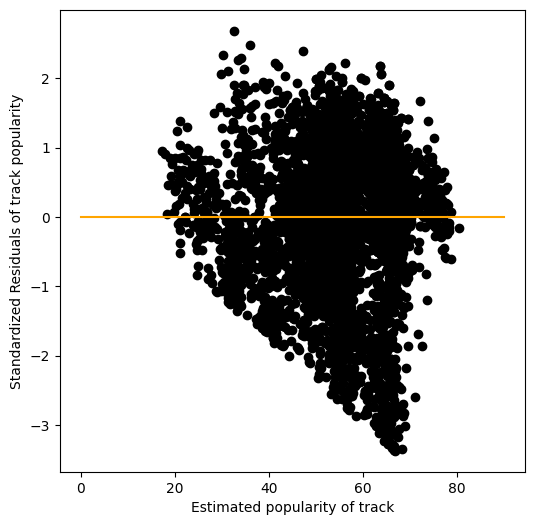

In [6]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black') 
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

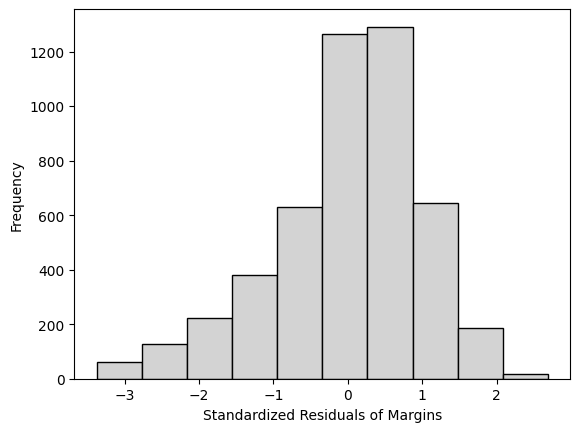

In [7]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### 四項殘差分析

#### The model: zero mean

In [8]:
np.mean(standardized_residuals)

3.147856815344811e-05

#### The model: homoscedasticity (equal variance)

### 自己看

#### The model: normality

In [9]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9638
p-value: 0.0000


#### The model: independent residuals

In [10]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -41.8393
p-value: 0.0000


## 三個交互作用項
這裡我們建立了三個交互作用項：

- `danceability_tempo`：舞蹈性 × 節奏（danceability × tempo），反映歌曲的舞蹈感與節奏快慢的綜合效果。
- `danceability_energy`：舞蹈性 × 能量（danceability × energy），結合舞蹈感與能量感，捕捉兩者同時高或低時的影響。
- `energy_valence`：能量 × 愉悅度（energy × valence），用來觀察高能量且愉悅的歌曲是否特別受歡迎。

這些交互作用項有助於模型捕捉變數間非線性的聯合效果，提升預測能力。

In [11]:
# 先建立交互作用項
data_interact = data.copy()
# 1. danceability × tempo
data_interact['danceability_tempo'] = data_interact['danceability'] * data_interact['tempo']
# 2. danceability × energy
data_interact['danceability_energy'] = data_interact['danceability'] * data_interact['energy']
# 3. energy × valence
data_interact['energy_valence'] = data_interact['energy'] * data_interact['valence']

# 準備 response
response = 'track_popularity'

# 將所有 predictor（原本的 + 交互作用項）組合
predictors_interact = [col for col in data_interact.columns if col != response]

# 執行 backward selection
result_interact = backward_selection(data_interact[predictors_interact + [response]], response=response)
print(result_interact.summary())

liveness is removed with p-value 0.9624.

genre_soul is removed with p-value 0.8417.

genre_mandopop is removed with p-value 0.7422.

genre_ambient is removed with p-value 0.7773.

genre_lofi is removed with p-value 0.6791.

duration_ms is removed with p-value 0.6026.

mode is removed with p-value 0.4990.

genre_latin is removed with p-value 0.4078.

genre_reggae is removed with p-value 0.3707.

genre_country is removed with p-value 0.3557.

danceability_tempo is removed with p-value 0.3267.

acousticness is removed with p-value 0.2532.

energy_valence is removed with p-value 0.2474.

genre_jazz is removed with p-value 0.1813.

tempo is removed with p-value 0.1311.

genre_arabic is removed with p-value 0.0586.

genre_turkish is removed with p-value 0.0854.

genre_gospel is removed with p-value 0.0682.

valence is removed with p-value 0.0683.

danceability is removed with p-value 0.0540.

No variable is removed. Stop.
                            OLS Regression Results                   

Text(0, 0.5, 'Standardized Residuals of track popularity')

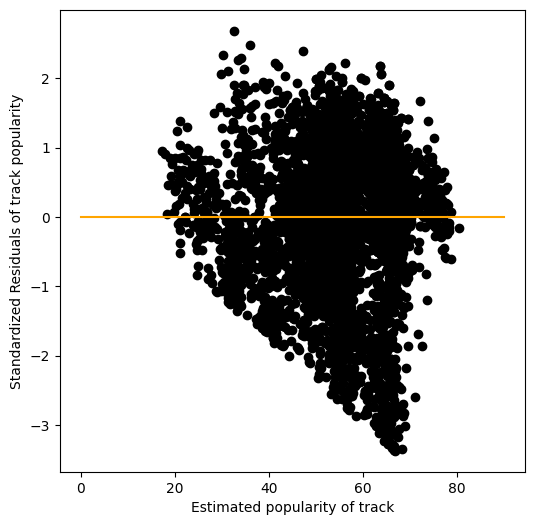

In [12]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black') 
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

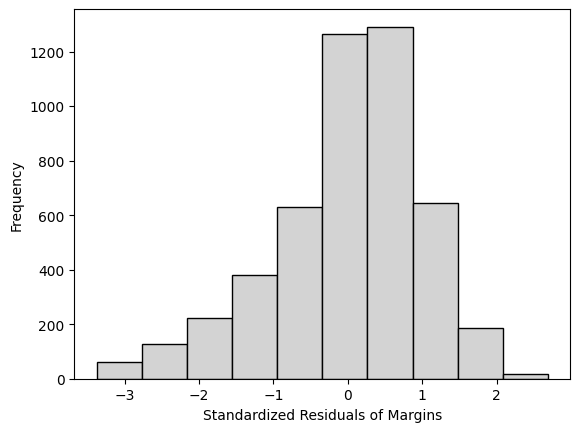

In [13]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### 四項殘差分析

#### The model: zero mean

In [14]:
np.mean(standardized_residuals)

3.147856815344811e-05

#### The model: homoscedasticity (equal variance)

### 自己看

#### The model: normality

In [15]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9638
p-value: 0.0000


#### The model: independent residuals

In [16]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -41.8393
p-value: 0.0000


## Backwards Stepwise Regression
### 應變數為 $ \log(\text{track\_popularity}) $

In [17]:

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True).astype(int)

# 建立模型資料集，包含所有欄位（去除目標變數與 genre_dummies 重複欄位）
exclude_cols = ['playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy

# 將 track_popularity 取 log（加 1 防止 log(0)）
df['track_popularity'] = np.log(df['track_popularity'])
predictors = [col for col in df.columns if col not in exclude_cols]


data = pd.concat([
    df[predictors],
    genre_dummies[[col for col in genre_dummies.columns if col.startswith('genre_')]]
], axis=1)

# print(data.shape)
# display(data['genre_ambient'].value_counts())
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

genre_turkish is removed with p-value 0.9867.

genre_arabic is removed with p-value 0.9603.

liveness is removed with p-value 0.9158.

genre_gospel is removed with p-value 0.8633.

genre_country is removed with p-value 0.7872.

genre_latin is removed with p-value 0.6493.

mode is removed with p-value 0.3659.

genre_jazz is removed with p-value 0.3472.

tempo is removed with p-value 0.2499.

genre_mandopop is removed with p-value 0.2417.

duration_ms is removed with p-value 0.2172.

valence is removed with p-value 0.2273.

genre_soul is removed with p-value 0.2176.

genre_reggae is removed with p-value 0.1490.

acousticness is removed with p-value 0.1035.

energy is removed with p-value 0.1085.

genre_ambient is removed with p-value 0.0940.

speechiness is removed with p-value 0.0787.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.259
Model:          

Text(0, 0.5, 'Residuals of log(track popularity)')

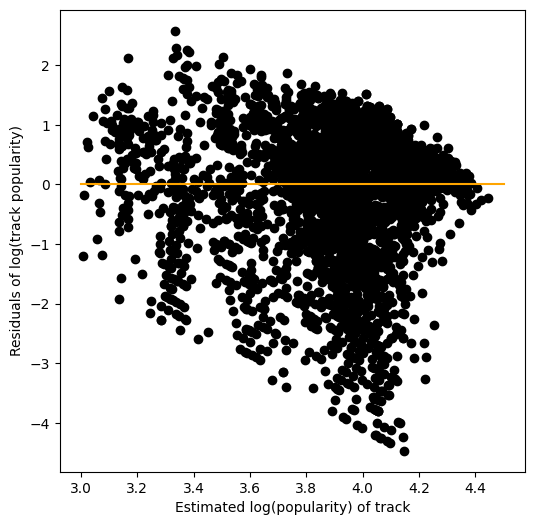

In [18]:
influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black') 
plt.plot([3, 4.5], [0, 0], color = 'orange')
plt.xlabel('Estimated log(popularity) of track')
plt.ylabel('Residuals of log(track popularity)')


Text(0, 0.5, 'Frequency')

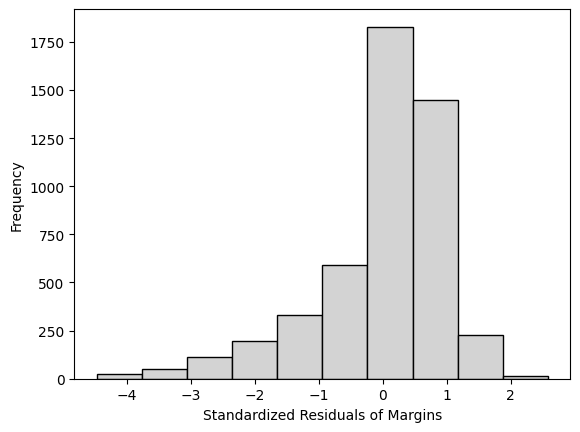

In [19]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### 四項殘差分析

#### The model: zero mean

In [20]:
np.mean(standardized_residuals)

2.6682311789197867e-05

#### The model: homoscedasticity (equal variance)

### 自己看

#### The model: normality

In [21]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.8934
p-value: 0.0000


#### The model: independent residuals

In [22]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -39.0126
p-value: 0.0000


## Genre Pop ols


In [23]:

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'pop' ]  # 去除 track_popularity <= 0 的資料

exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors]], axis=1)

# 自動產生公式
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# 建模
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# 顯示結果
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     7.327
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.86e-12
Time:                        01:23:37   Log-Likelihood:                -2342.7
No. Observations:                 515   AIC:                             4711.
Df Residuals:                     502   BIC:                             4767.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           23.7547     14.016  

Text(0, 0.5, 'Standardized Residuals of track popularity')

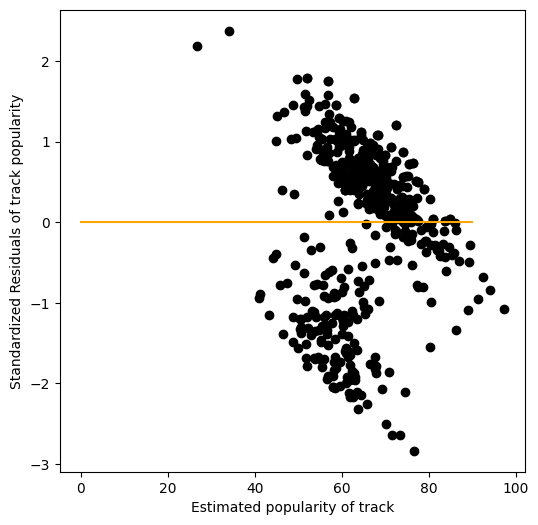

In [24]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black') 
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

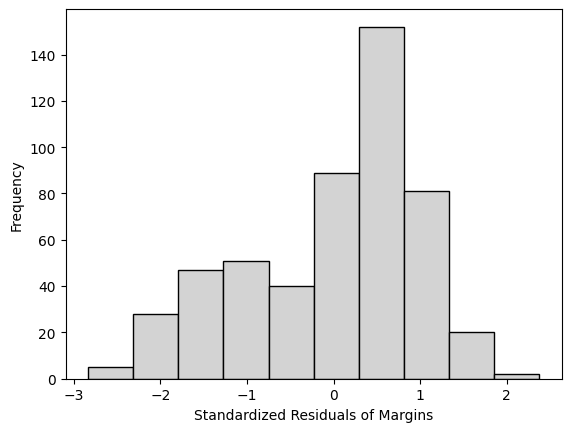

In [25]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### 四項殘差分析

#### The model: zero mean

In [26]:
np.mean(standardized_residuals)

0.0006916619996732638

#### The model: homoscedasticity (equal variance)

### 自己看

#### The model: normality

In [27]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9434
p-value: 0.0000


#### The model: independent residuals

In [28]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -14.7655
p-value: 0.0000


## Backwards Stepwise Regression
### Genre Pop

In [29]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'pop' ]  # 去除 track_popularity <= 0 的資料


# 建立模型資料集，包含所有欄位（去除目標變數與 genre_dummies 重複欄位）
exclude_cols = ['playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],
    
], axis=1)
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

liveness is removed with p-value 0.9074.

danceability is removed with p-value 0.8329.

tempo is removed with p-value 0.6245.

mode is removed with p-value 0.5666.

speechiness is removed with p-value 0.5220.

energy is removed with p-value 0.1524.

instrumentalness is removed with p-value 0.2232.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     16.76
Date:                Wed, 28 May 2025   Prob (F-statistic):           2.44e-15
Time:                        01:23:37   Log-Likelihood:                -2345.0
No. Observations:                 515   AIC:                             4702.
Df Residuals:                     509   BIC:                             4728.
Df Model:                           5 

Text(0, 0.5, 'Standardized Residuals of track popularity')

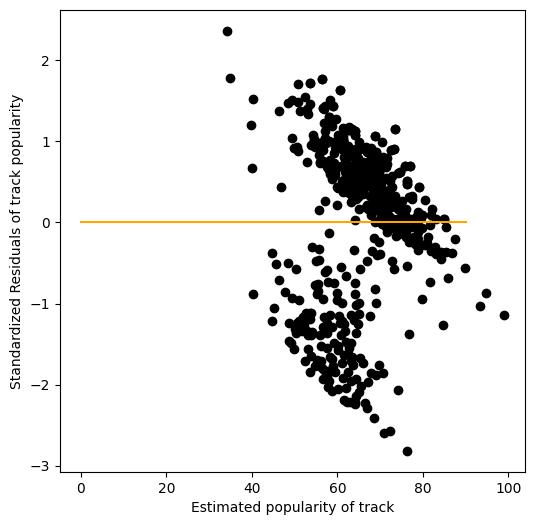

In [30]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black') 
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

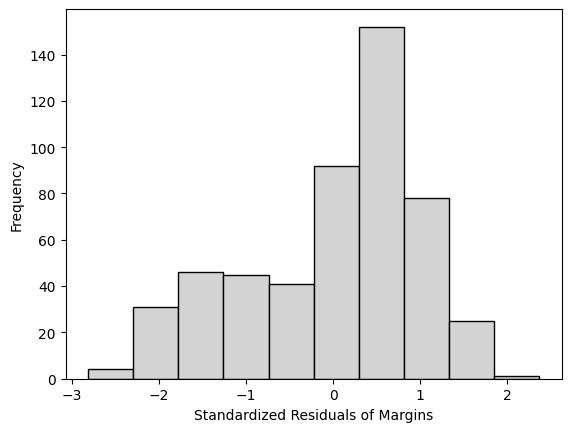

In [31]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### 四項殘差分析

#### The model: zero mean

In [32]:
np.mean(standardized_residuals)

0.000474908705546643

#### The model: homoscedasticity (equal variance)

### 自己看

#### The model: normality

In [33]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9397
p-value: 0.0000


#### The model: independent residuals

In [34]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -14.7497
p-value: 0.0000


## Genre 的曲數 > 100 做 ols

In [35]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
# 篩選 playlist_genre 數量大於 30 的資料
genre_counts = df['playlist_genre'].value_counts()
df = df[df['playlist_genre'].isin(genre_counts[genre_counts > 100].index)]


print(df['playlist_genre'].value_counts())
genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True)

exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors], genre_dummies], axis=1)

# 自動產生公式
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# 建模
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# 顯示結果
print(result.summary())

playlist_genre
electronic    589
pop           515
latin         425
hiphop        395
ambient       359
rock          345
lofi          299
world         228
arabic        208
brazilian     148
jazz          146
gaming        133
classical     121
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     64.65
Date:                Wed, 28 May 2025   Prob (F-statistic):          1.31e-261
Time:                        01:23:38   Log-Likelihood:                -16681.
No. Observations:                3910   AIC:                         3.341e+04
Df Residuals:                    3885   BIC:                         3.357e+04
Df Model:                          24                                         
Covariance Typ

Text(0, 0.5, 'Standardized Residuals of track popularity')

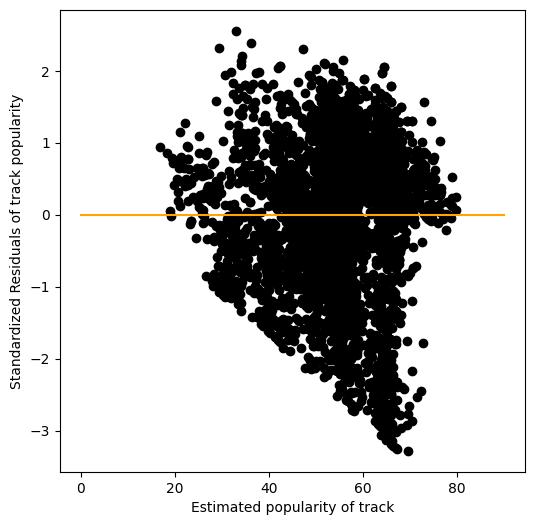

In [36]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black') 
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

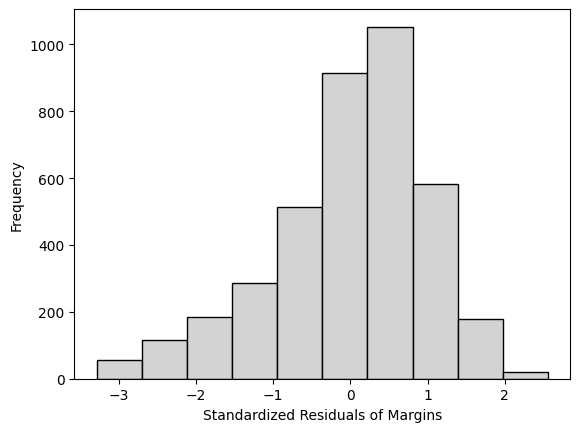

In [37]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### 四項殘差分析

#### The model: zero mean

In [38]:
np.mean(standardized_residuals)

-2.4757540208839274e-05

#### The model: homoscedasticity (equal variance)

### 自己看

#### The model: normality

In [39]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9623
p-value: 0.0000


#### The model: independent residuals

In [40]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -38.9829
p-value: 0.0000


## Backwards Stepwise Regression
### 應變數為 $ \text{track\_popularity} $

#### Genre 的曲數 > 100

In [41]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
# 篩選 playlist_genre 數量大於 100 的資料
genre_counts = df['playlist_genre'].value_counts()
df = df[df['playlist_genre'].isin(genre_counts[genre_counts > 100].index)]


print(df['playlist_genre'].value_counts())

genre_dummies = pd.get_dummies(df["playlist_genre"], prefix="genre", drop_first=True).astype(int)

# 建立模型資料集，包含所有欄位（去除目標變數與 genre_dummies 重複欄位）
exclude_cols = ['playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],
    genre_dummies[[col for col in genre_dummies.columns if col.startswith('genre_')]]
], axis=1)

result = backward_selection(data, response = 'track_popularity')
print(result.summary())

playlist_genre
electronic    589
pop           515
latin         425
hiphop        395
ambient       359
rock          345
lofi          299
world         228
arabic        208
brazilian     148
jazz          146
gaming        133
classical     121
Name: count, dtype: int64
liveness is removed with p-value 0.8413.

genre_lofi is removed with p-value 0.8191.

mode is removed with p-value 0.6166.

genre_latin is removed with p-value 0.5988.

acousticness is removed with p-value 0.4259.

tempo is removed with p-value 0.2333.

energy is removed with p-value 0.1439.

genre_electronic is removed with p-value 0.2047.

loudness is removed with p-value 0.0840.

genre_jazz is removed with p-value 0.1002.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Leas

Text(0, 0.5, 'Standardized Residuals of track popularity')

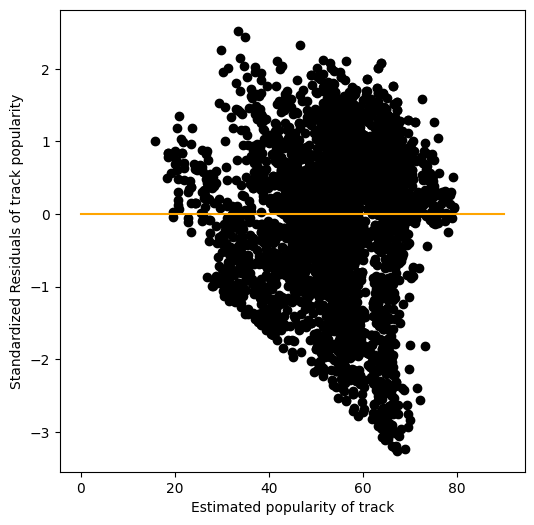

In [42]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black') 
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

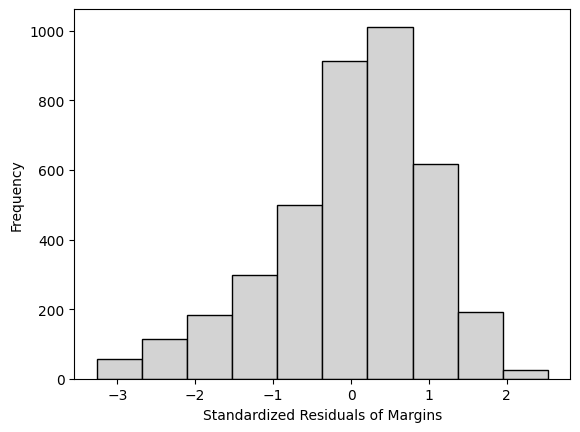

In [43]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### 四項殘差分析

#### The model: zero mean

In [44]:
np.mean(standardized_residuals)

-3.323057807008232e-05

#### The model: homoscedasticity (equal variance)

### 自己看

#### The model: normality

In [45]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9638
p-value: 0.0000


#### The model: independent residuals

In [46]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -38.4478
p-value: 0.0000


## Genre Gaming


In [47]:
import statsmodels.formula.api as smf

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'gaming' ]  # 去除 track_popularity <= 0 的資料

print(df['playlist_genre'].value_counts())
exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors]], axis=1)

# 自動產生公式
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# 建模
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# 顯示結果
print(result.summary())

playlist_genre
gaming    133
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     20.61
Date:                Wed, 28 May 2025   Prob (F-statistic):           8.35e-24
Time:                        01:23:43   Log-Likelihood:                -502.42
No. Observations:                 133   AIC:                             1031.
Df Residuals:                     120   BIC:                             1068.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Text(0, 0.5, 'Standardized Residuals of track popularity')

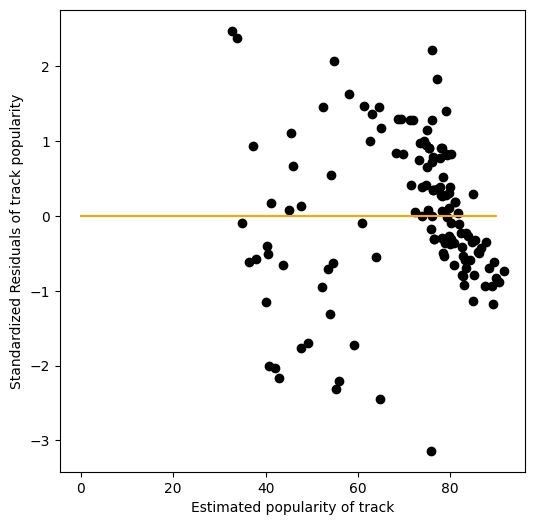

In [48]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black') 
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

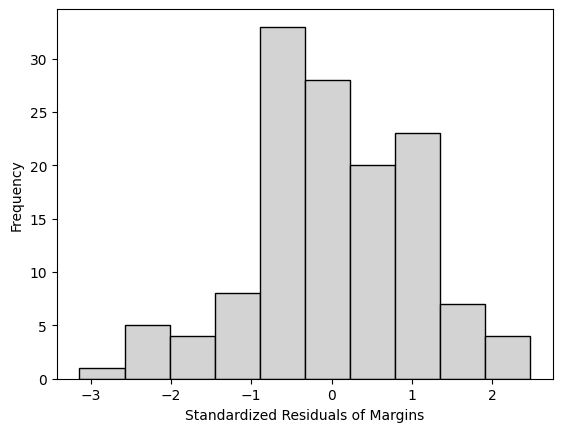

In [49]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### 四項殘差分析

#### The model: zero mean

In [50]:
np.mean(standardized_residuals)

0.006573797435076452

#### The model: homoscedasticity (equal variance)

### 自己看

#### The model: normality

In [51]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9852
p-value: 0.1590


#### The model: independent residuals

In [52]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -3.5574
p-value: 0.0004


## Backwards Stepwise Regression
### Genre Gaming


In [53]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'gaming' ]  # 去除 track_popularity <= 0 的資料

print(df['playlist_genre'].value_counts())

# 建立模型資料集，包含所有欄位（去除目標變數與 genre_dummies 重複欄位）
exclude_cols = ['playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],
    
], axis=1)
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

playlist_genre
gaming    133
Name: count, dtype: int64
duration_ms is removed with p-value 0.9617.

speechiness is removed with p-value 0.9348.

energy is removed with p-value 0.8690.

mode is removed with p-value 0.8230.

key is removed with p-value 0.4682.

liveness is removed with p-value 0.4174.

valence is removed with p-value 0.3164.

acousticness is removed with p-value 0.3163.

loudness is removed with p-value 0.4040.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     84.53
Date:                Wed, 28 May 2025   Prob (F-statistic):           2.62e-30
Time:                        01:23:43   Log-Likelihood:                -504.53
No. Observations:                 133   AIC:                     

Text(0, 0.5, 'Standardized Residuals of track popularity')

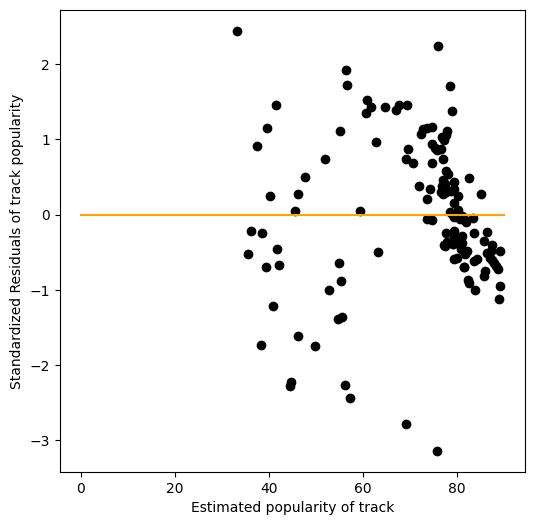

In [54]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black') 
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

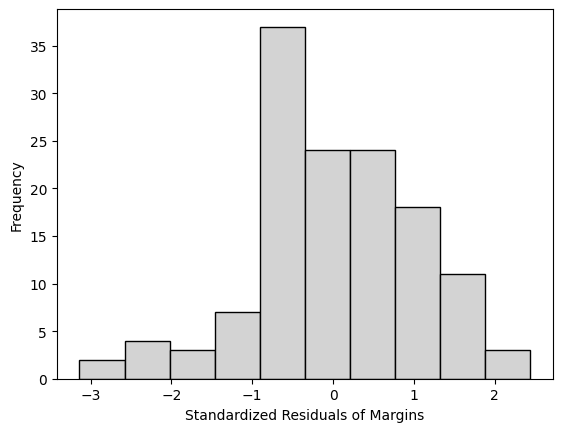

In [55]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')

### 四項殘差分析

#### The model: zero mean

In [56]:
np.mean(standardized_residuals)

0.0016112702176818733

#### The model: homoscedasticity (equal variance)

### 自己看

#### The model: normality

In [57]:
import scipy.stats as scipy_stats
# Shapiro test
statistic, p_value = scipy_stats.shapiro(standardized_residuals)

print(f"Shapiro test statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

Shapiro test statistic: 0.9796
p-value: 0.0429


#### The model: independent residuals

In [58]:
# run test
from statsmodels.sandbox.stats.runs import runstest_1samp

z_stat, p_value = runstest_1samp(standardized_residuals, correction=True)

print(f"Runs test z statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

Runs test z statistic: -3.1974
p-value: 0.0014


### ROCK

In [63]:
import statsmodels.formula.api as smf

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'rock' ]  # 去除 track_popularity <= 0 的資料

print(df['playlist_genre'].value_counts())
exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors]], axis=1)

# 自動產生公式
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# 建模
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# 顯示結果
print(result.summary())

playlist_genre
rock    345
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.661
Date:                Wed, 28 May 2025   Prob (F-statistic):             0.0741
Time:                        01:27:11   Log-Likelihood:                -1421.5
No. Observations:                 345   AIC:                             2869.
Df Residuals:                     332   BIC:                             2919.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### 後面來?

In [ ]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'rock' ]  # 去除 track_popularity <= 0 的資料

print(df['playlist_genre'].value_counts())

# 建立模型資料集，包含所有欄位（去除目標變數與 genre_dummies 重複欄位）
exclude_cols = ['playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],
    
], axis=1)
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

playlist_genre
rock    345
Name: count, dtype: int64
danceability is removed with p-value 0.7259.

duration_ms is removed with p-value 0.6218.

liveness is removed with p-value 0.4469.

instrumentalness is removed with p-value 0.3497.

speechiness is removed with p-value 0.3422.

acousticness is removed with p-value 0.2759.

tempo is removed with p-value 0.2225.

mode is removed with p-value 0.1342.

key is removed with p-value 0.1951.

energy is removed with p-value 0.1038.

loudness is removed with p-value 0.3696.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.113
Date:                Wed, 28 May 2025   Prob (F-statistic):            0.00802
Time:                        01:27:13   Log-Likeliho

### Hipop

In [65]:
import statsmodels.formula.api as smf

df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'hiphop' ]  # 去除 track_popularity <= 0 的資料

print(df['playlist_genre'].value_counts())
exclude_cols = ['track_popularity', 'playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]
df_model = pd.concat([df[predictors]], axis=1)

# 自動產生公式
formula = "track_popularity ~ " + " + ".join(df_model.columns)

# 建模
model = smf.ols(formula, data=pd.concat([df["track_popularity"], df_model], axis=1))
result = model.fit()

# 顯示結果
print(result.summary())

playlist_genre
hiphop    395
Name: count, dtype: int64
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     8.349
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.70e-14
Time:                        01:27:15   Log-Likelihood:                -1646.1
No. Observations:                 395   AIC:                             3318.
Df Residuals:                     382   BIC:                             3370.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### backward hipop

In [66]:
df = pd.concat([high, low], ignore_index=True)
df['playlist_genre'] = df['playlist_genre'].replace('hip-hop', 'hiphop')
df['playlist_genre'] = df['playlist_genre'].replace('j-pop', 'jpop')
df['playlist_genre'] = df['playlist_genre'].replace('k-pop', 'kpop')
df['playlist_genre'] = df['playlist_genre'].replace('r&b', 'r8b')

drop_cols = ['track_artist', 'time_signature', 'track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url', 'track_id', 'track_name', 'track_album_release_date', 'track_album_id', 'id', 'playlist_subgenre', 'type', 'playlist_id']

df = df.drop(columns=drop_cols)
df = df[df['playlist_genre'] ==  'hiphop' ]  # 去除 track_popularity <= 0 的資料

print(df['playlist_genre'].value_counts())

# 建立模型資料集，包含所有欄位（去除目標變數與 genre_dummies 重複欄位）
exclude_cols = ['playlist_genre']  # track_popularity 是目標變數，playlist_genre 已經 dummy
predictors = [col for col in df.columns if col not in exclude_cols]

data = pd.concat([
    df[predictors],
    
], axis=1)
result = backward_selection(data, response = 'track_popularity')
print(result.summary())

playlist_genre
hiphop    395
Name: count, dtype: int64
mode is removed with p-value 0.9771.

tempo is removed with p-value 0.8882.

danceability is removed with p-value 0.7968.

acousticness is removed with p-value 0.4265.

liveness is removed with p-value 0.1807.

key is removed with p-value 0.0581.

valence is removed with p-value 0.0662.

No variable is removed. Stop.
                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     18.03
Date:                Wed, 28 May 2025   Prob (F-statistic):           4.33e-16
Time:                        01:27:17   Log-Likelihood:                -1650.9
No. Observations:                 395   AIC:                             3314.
Df Residuals:                     389   BIC:                             

In [69]:
np.mean(standardized_residuals)

-0.0005919358380931729

Text(0, 0.5, 'Standardized Residuals of track popularity')

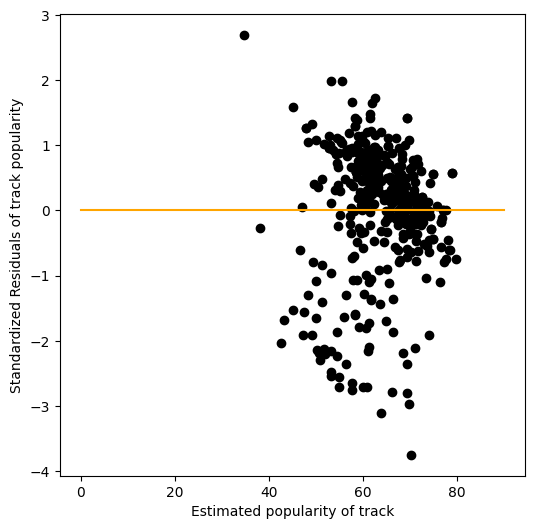

In [67]:
import matplotlib.pyplot as plt

influence = result.get_influence()
residuals = result.resid
standardized_residuals = influence.resid_studentized_internal
estimated_values = result.fittedvalues
plt.figure(figsize = (6, 6))

plt.plot(estimated_values, standardized_residuals, 'o', color = 'black') 
plt.plot([0, 90], [0, 0], color = 'orange')

plt.xlabel('Estimated popularity of track')
plt.ylabel('Standardized Residuals of track popularity')

Text(0, 0.5, 'Frequency')

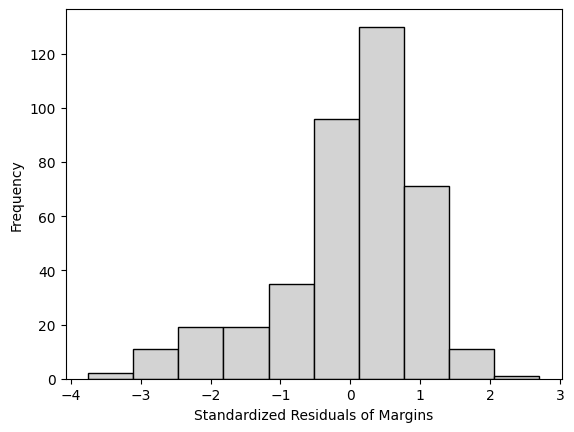

In [68]:
plt.hist(standardized_residuals, facecolor = 'lightgrey', edgecolor = 'black')
plt.xlabel('Standardized Residuals of Margins')
plt.ylabel('Frequency')